IT24100444 FIRKY MAA Encoding categorical variables

In [25]:
# library load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder

In [12]:
data = pd.read_csv("winequality-red.csv",sep=';')
print("Original Data Sample:")
print(data.head())

Original Data Sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

In [13]:
#dimension of the DataFrame
data.shape

(1599, 12)

In [14]:
# rename the columns
data = data.rename(columns={"fixed acidity":"fixed-acidity","volatile acidity":"volatile-acidity","citric acid":"Citric-acid",
             'residual sugar':'residual-sugar' , 'chlorides':'Chlorides',
             'free sulfur dioxide':'free-s-dioxide' ,'total sulfur dioxide':'total-s-dioxide',
             'density':'Density' ,'pH':'pH','sulphates':'Sulphates','alcohol':'Alcohol',
             'quality':'Quality'})

In [15]:
#data columns
data.columns

Index(['fixed-acidity', 'volatile-acidity', 'Citric-acid', 'residual-sugar',
       'Chlorides', 'free-s-dioxide', 'total-s-dioxide', 'Density', 'pH',
       'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')

In [16]:
#data column and row count
data.columns.shape
data.count()

,0
fixed-acidity,1599
volatile-acidity,1599
Citric-acid,1599
residual-sugar,1599
Chlorides,1599
free-s-dioxide,1599
total-s-dioxide,1599
Density,1599
pH,1599
Sulphates,1599


In [17]:
# find the duplicate rows
duplicate_rows_indata = data[data.duplicated()]
print("number of duplicate rows: ",duplicate_rows_indata.shape)

number of duplicate rows:  (240, 12)


In [18]:
# remove the duplicate rows
data.drop_duplicates(inplace=True)
print(data.shape)

(1359, 12)


In [19]:
data.dtypes

,0
fixed-acidity,float64
volatile-acidity,float64
Citric-acid,float64
residual-sugar,float64
Chlorides,float64
free-s-dioxide,float64
total-s-dioxide,float64
Density,float64
pH,float64
Sulphates,float64


In [20]:
#Missing or Null Values
print(data.isna().sum())

fixed-acidity       0
volatile-acidity    0
Citric-acid         0
residual-sugar      0
Chlorides           0
free-s-dioxide      0
total-s-dioxide     0
Density             0
pH                  0
Sulphates           0
Alcohol             0
Quality             0
dtype: int64


In [21]:
display(data.head())
display(data.tail())

,fixed-acidity,volatile-acidity,Citric-acid,residual-sugar,Chlorides,free-s-dioxide,total-s-dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


,fixed-acidity,volatile-acidity,Citric-acid,residual-sugar,Chlorides,free-s-dioxide,total-s-dioxide,Density,pH,Sulphates,Alcohol,Quality
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [22]:
# define the labels accounding to the Quality value
def quality_group(q):
    if q <= 4:
        return "Low"
    elif 4 <= q <= 5:
        return "Medium"
    else:
        return "High"

data["Quality_Group"] = data["Quality"].apply(quality_group)
print("Grouped Quality:")
print(data[["Quality", "Quality_Group"]].head(10), "\n")

Grouped Quality:
    Quality Quality_Group
0         5        Medium
1         5        Medium
2         5        Medium
3         6          High
5         5        Medium
6         5        Medium
7         7          High
8         7          High
9         5        Medium
10        5        Medium 



/tmp/ipython-input-627716040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality_Group', data=data, order=['Low', 'Medium', 'High'], palette='viridis')


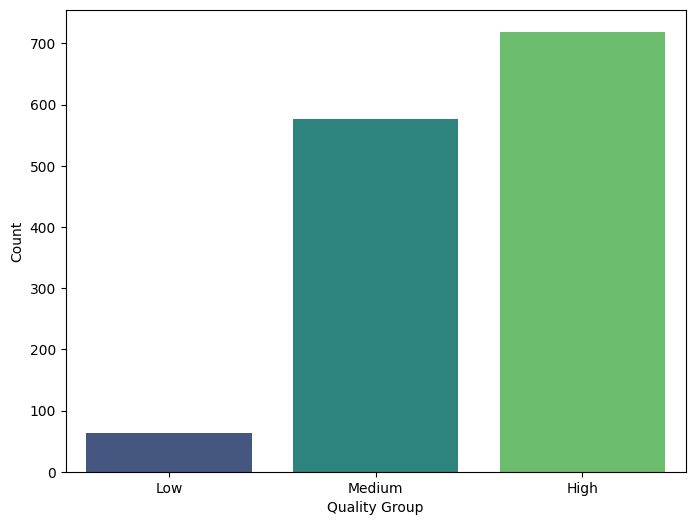

In [26]:

# Create a bar plot of the Quality Group column
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality_Group', data=data, order=['Low', 'Medium', 'High'], palette='viridis')
plt.xlabel('Quality Group')
plt.ylabel('Count')
plt.show()

Visualizations saved as 'quality_group_histogram.png', 'feature_boxplots.png', and 'correlation_heatmap.png'


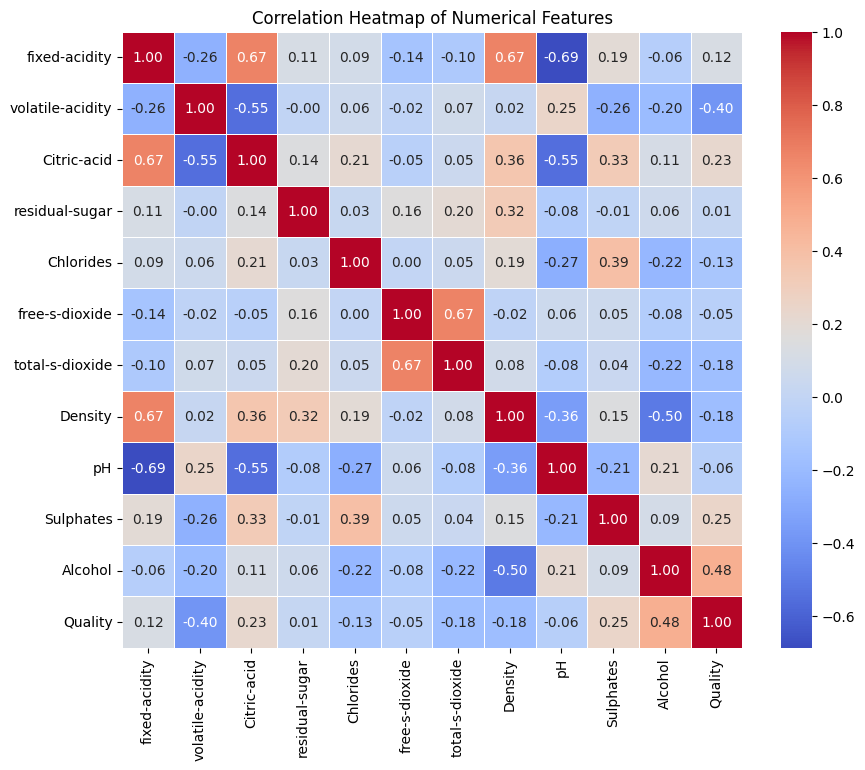

In [33]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 8))
corr_matrix = data.drop(columns=["Quality_Group"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
print("Visualizations saved as 'quality_group_histogram.png', 'feature_boxplots.png', and 'correlation_heatmap.png'")